# Genetic Optimization (GO) 

In [1]:
# Import path to source directory (bit of a hack in Jupyter)
import sys
import os
pwd = %pwd
sys.path.append(os.path.join(pwd, os.path.join('..', 'src')))

# Ensure modules are reloaded on any change (very useful when developing code on the fly)
%load_ext autoreload
%autoreload 2

In [2]:
# Import external libraries
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

In [3]:
# initialization
from objfun_node2vec import N2V
n2v = N2V('../data/clear_cluster_test/one_eighth.csv',
            '../data/clear_cluster_test/labels.csv')

__Experiment run__

In [4]:
from heur_go_single import GeneticOptimization

In [5]:
NUM_RUNS = 50 
maxeval = 50 

In [6]:
# traditional testing procedure setup
def experiment_go(of, maxeval, num_runs, N):
    results = []
    heur_name = 'GO_{}'.format(N)
    for i in tqdm(range(num_runs), 'Testing {}'.format(heur_name)):
        result = GeneticOptimization(of, maxeval, N=N).search()
        result['run'] = i
        result['heur'] = heur_name
        result['N'] = N
        results.append(result)
    return pd.DataFrame(results, columns=['heur', 'run', 'N', 'best_x', 'best_y', 'neval'])

In [7]:
results = pd.DataFrame()
for N in [2,4,8,10,12]:
    res = experiment_go(of=n2v, maxeval=maxeval, num_runs=NUM_RUNS, N=N)
    results = pd.concat([results, res], axis=0)

In [8]:
results

,heur,run,N,best_x,best_y,neval
0,GO_2,0,2,"[1.5218602237573098, 1.0, 10.0, 80.0, 10.0]",0.693182,inf
1,GO_2,1,2,"[6.995274678675359, 1.0, 10.0, 80.0, 10.0]",0.464286,inf
2,GO_2,2,2,"[3.163792506151784, 1.0, 10.0, 80.0, 10.0]",0.597826,inf
3,GO_2,3,2,"[4.150653677202894, 1.0, 10.0, 80.0, 10.0]",0.554348,inf
4,GO_2,4,2,"[2.0974301309819827, 1.0, 10.0, 80.0, 10.0]",0.797619,inf
...,...,...,...,...,...,...
45,GO_12,45,12,"[0.49575669716602616, 1.0, 10.0, 80.0, 10.0]",1.000000,8.0
46,GO_12,46,12,"[0.34241993202491683, 1.0, 10.0, 80.0, 10.0]",0.892857,inf
47,GO_12,47,12,"[0.417579621964816, 1.0, 10.0, 80.0, 10.0]",1.000000,1.0
48,GO_12,48,12,"[1.7384109835434334, 1.0, 10.0, 80.0, 10.0]",0.797619,inf


In [9]:
# import visualization libraries
import matplotlib
# %matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

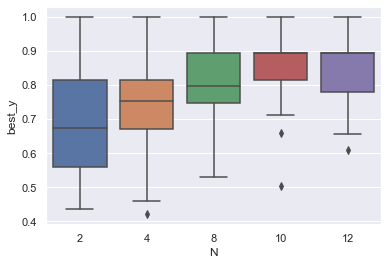

In [20]:
ax = sns.boxplot(x="N", y="best_y", data=results)

__Number of evaluations (when successful), based on N?__

In [10]:
results['success'] = results['neval'] < np.inf

In [11]:
results[results['success'] == True].head()

,heur,run,N,best_x,best_y,neval,success
5,GO_2,5,2,"[0.9286342316642069, 1.0, 10.0, 80.0, 10.0]",1.0,22.0,True
13,GO_2,13,2,"[0.4935899701959263, 1.0, 10.0, 80.0, 10.0]",1.0,20.0,True
14,GO_2,14,2,"[0.6217050076146173, 1.0, 10.0, 80.0, 10.0]",1.0,1.0,True
22,GO_2,22,2,"[0.5897681613416177, 1.0, 10.0, 80.0, 10.0]",1.0,14.0,True
35,GO_2,35,2,"[0.5584404788660728, 1.0, 10.0, 80.0, 10.0]",1.0,6.0,True


In [12]:
results[results['success'] == True].groupby(['N'])['neval'].mean()

N
2     12.600000
4     15.500000
8     10.500000
10    14.600000
12    16.272727
Name: neval, dtype: float64

In [13]:
results[results['success'] == True].groupby(['N'])['neval'].median()

N
2     14.0
4      8.5
8      7.0
10     4.0
12     9.0
Name: neval, dtype: float64

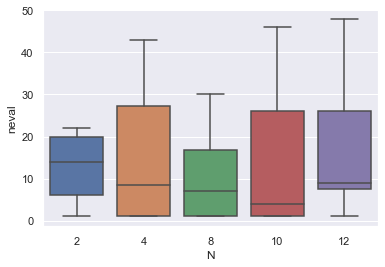

In [14]:
ax2 = sns.boxplot(x="N", y="neval", data=results[results['success'] == True])

In [15]:
# performance criteria
def rel(x):
    return len([n for n in x if n < np.inf])/len(x)
def mne(x):
    return np.mean([n for n in x if n < np.inf])
def feo(x):
    return mne(x)/rel(x)

In [16]:
results_pivot = results.pivot_table(
    index=['heur', 'N'],
    values=['neval'],
    aggfunc=(rel, mne, feo)
)['neval']
results_pivot = results_pivot.reset_index()
results_pivot.sort_values(by='N')

,heur,N,feo,mne,rel
2,GO_2,2,126.000000,12.600000,0.10
3,GO_4,4,129.166667,15.500000,0.12
4,GO_8,8,65.625000,10.500000,0.16
0,GO_10,10,73.000000,14.600000,0.20
1,GO_12,12,73.966942,16.272727,0.22


In [18]:
results_pivot.sort_values(by=['feo']).head(3)

,heur,N,feo,mne,rel
4,GO_8,8,65.625000,10.500000,0.16
0,GO_10,10,73.000000,14.600000,0.20
1,GO_12,12,73.966942,16.272727,0.22


In [21]:
results['best_y'].mean()

0.7970411613455568

In [23]:
results['best_y'].median()

0.7976190476190477

In [25]:
results['best_y'].mode()

0    0.892857
dtype: float64

In [26]:
results['best_y'].max()

1.0

## Conclusion

- According to the statistics the algorithm worked fast with population size of $2$ and $12$.
- According to FEO, two solutions in one population give the most reliable results in
the Genetic heuristics.